
# Project: No-Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project seeks to analyse the no-show appointments data from the Brazilian medical sector.
This dataset contains information from 110,527 medical appointments in Brazil from 2016-04-29 to 2016-06-08 and is particularly focused on the question of whether or not patients show up for their appointment.

The main objective of the project is to investigate what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [1]:
# we first import all the pacakages that we need 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
# Cumtom functions used int the project
def column_to_datetime(df, cols_list):
    for i in cols_list:
        df[i]=pd.to_datetime(df[i])

<a id='wrangling'></a>
## (a) Data Wrangling


### General Properties

In [3]:
# we load the dataset into a pandas dataframe and inspect it
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# we check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Dataset inferance
#### * All 14 columns have no missing values, and no null vallues
#### * The PatientID and AppointmentID columns have no relevance in predicting patients who show up, so we remove them
#### * ScheduledDay and AppointmentDay columns have to be changed from type object to datetime for easier manipulations
#### * No-Show column's encoding is confusing, so we set its column name to 'Show' and 'Yes' to 0 and 'No' to 1


### Data Cleaning (Replace this with more specific notes!)

In [6]:

# first we drop both PatientID and AppointmentID Columns
df_cleaned = df.copy()
df_cleaned.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df_cleaned.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
# then, we change ScheduledDay and AppointmentDay columns from type object to datetime
# we make use of the custom 'column_to_datetime; function we defined above
column_to_datetime(df_cleaned, ['ScheduledDay','AppointmentDay'])
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  int64              
 6   Hipertension    110527 non-null  int64              
 7   Diabetes        110527 non-null  int64              
 8   Alcoholism      110527 non-null  int64              
 9   Handcap         110527 non-null  int64              
 10  SMS_received    110527 non-null  int64              
 11  No-show         110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.1+ MB


In [8]:
# then rename 'No-show' column to 'show' to remove confusion
# and 'Handcap' to 'Handicap' to fix the typo
df_cleaned.rename(columns={'No-show':'Show', 'Handcap':'Handicap'}, inplace=True)
df_cleaned.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# we then change show values from 'Yes' to 0 and 'No' to 1
df_cleaned['Show'] = df_cleaned['Show'].map({'Yes':0,'No':1})
df_cleaned.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [10]:
# after cleaning, we save it to new file
df_cleaned.to_csv('noshowappointments-kagglev2-may-2016_cleaned.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: What is the percentage of patients who showed up vs who do not?

In [11]:
df = pd.read_csv(r'noshowappointments-kagglev2-may-2016_cleaned.csv')
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


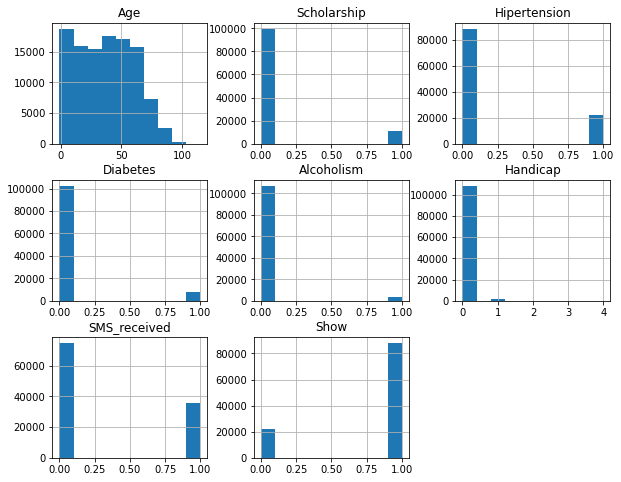

In [12]:
# histogram of each feature
df.hist(figsize=(10,8));

Observations
Most patients are below the age of 50 and have not been enrolled under the Brasilian Health Welfare program. Only few are enrolled under it.

Few number of the total patients are hypertensive, diabetic and do not drink alcohol. Almost all the patients are not physically handicapped. Majority do not receive sms messages but showed on their appointment date

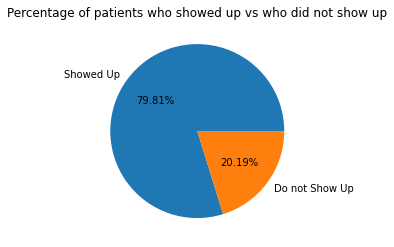

In [13]:
# Plotting the pie chart for percentage of who showed up vs who do not
data = [df_cleaned.query('Show == 1').count()[0], df_cleaned.query('Show == 0').count()[0]]
plt.pie(data, autopct='%0.2f%%', labels=['Showed Up', 'Do not Show Up'])
plt.title("Percentage of patients who showed up vs who did not show up");

### Research Question 2  (Does SMS_received and Scholarship affect patients ability to show up?)

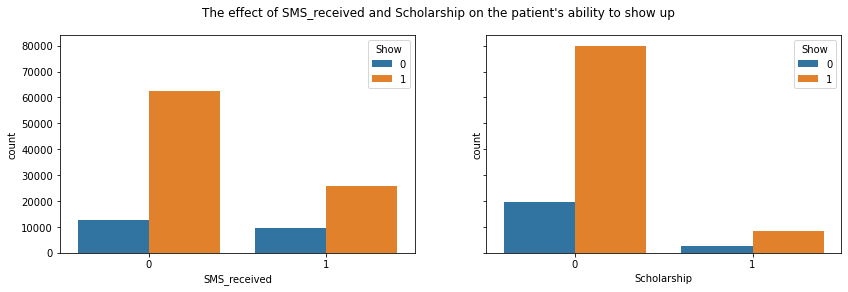

In [20]:

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.countplot(x='SMS_received', data=df, hue='Show', ax=ax1 )
sns.countplot(x='Scholarship', data=df, hue='Show', ax=ax2)
fig.set_figwidth(14)
fig.set_figheight(4)
fig.suptitle("The effect of SMS_received and Scholarship on the patient's ability to show up");

SMS_received and Scholarship does not affect patient's ability to show up. There's not enough data to confirm too

In [ ]:
### Research Question 3  (Does patient's neighbourhood affect his/hers ability to show up?)

Text(0, 0.5, 'patients')

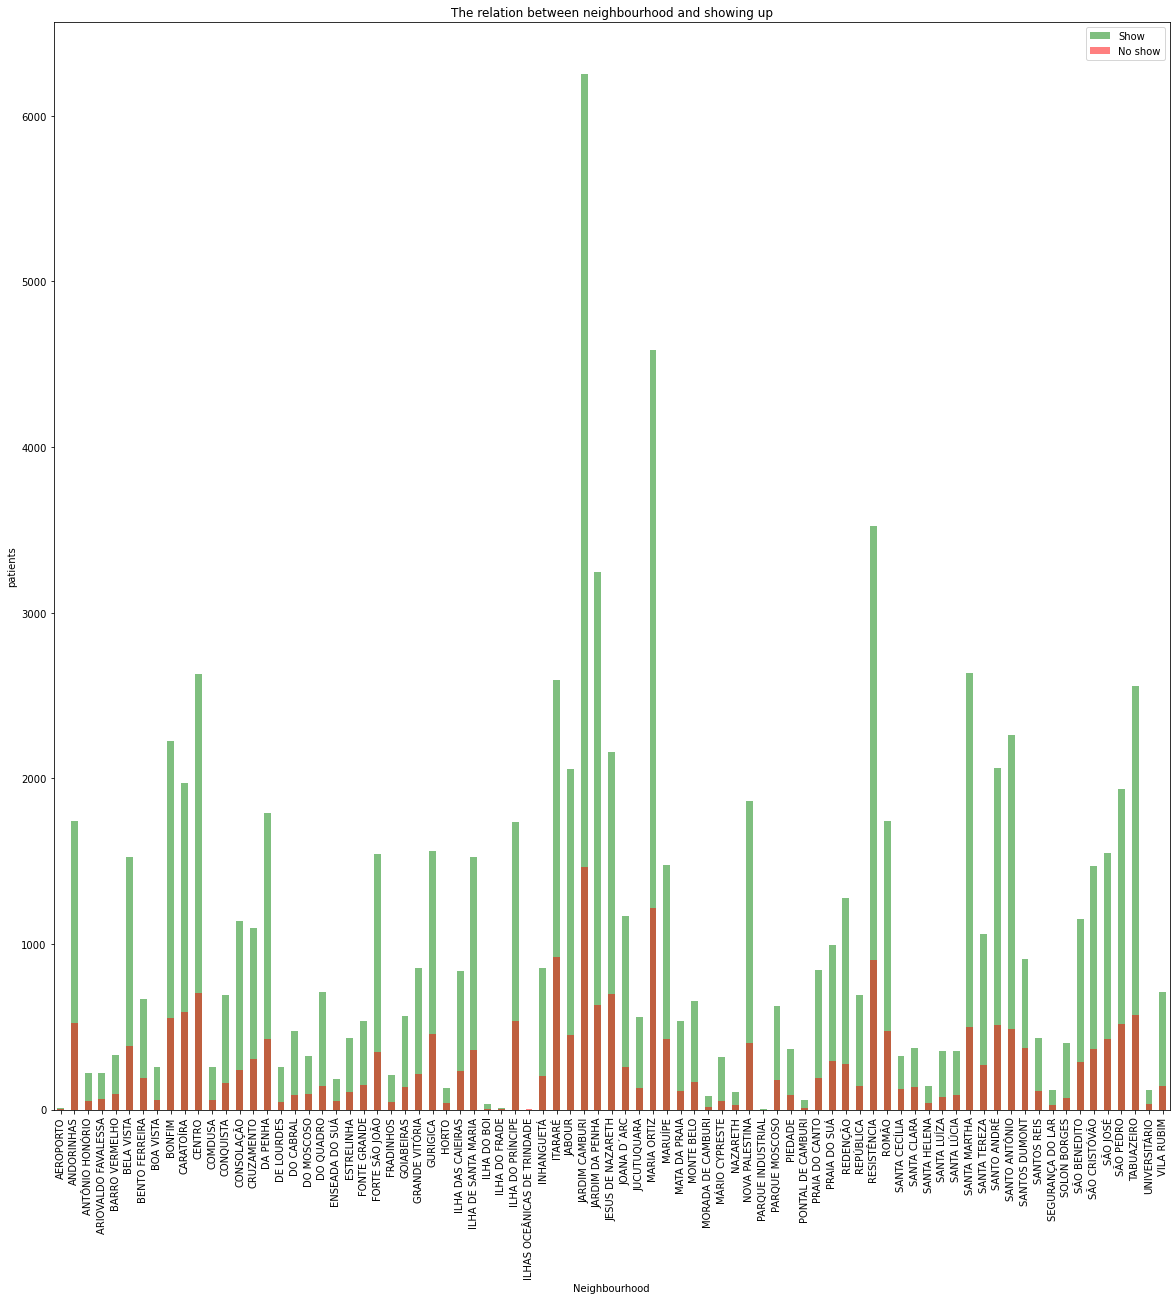

In [19]:
#size of plot 
plt.figure(figsize=[20,20])
#Determine the desired part
e = df_cleaned.groupby(['Neighbourhood','Show']).size().unstack()
e[1].plot(kind='bar' , alpha=.5 , color = 'green' , label= 'Show')
e[0].plot(kind='bar' , alpha=.5 , color = 'red' , label= 'No show')
plt.legend()
plt.title("The relation between neighbourhood and showing up")
plt.xlabel("Neighbourhood")
plt.ylabel("patients")

Most patients at JARDIM CAMBURI show up on thier appointments

<a id='conclusions'></a>
## Conclusions

This analysis sought to explore the no-show appointments data from the Brazilian medical sector, containing 110,527 appointments and of which approximately 20.19% do not show up on their scheduled appointment dates.

The project hope to provide insights to inform and direct in-depth research on the subject, in order to confirm the true causes of the failed appointments and find ways to eradicate them.


[Question 2] From the analysis, we may infer that the SMS_received and Scholarship  does not significantly influence the show status. This is because, of the total patients who showed up for their appointments, the number of patients that did not receive an sms is by far higher than those who did receive an sms. And also, the number of patients who are are not on scholarships are significantly higher than those who are on scholarship. Thus, receiving an sms or being on government health scholarship does not increase the chances of showing up for a scheduled appointment.

[Question 3] Most patients at JARDIM CAMBURI show up on their appointments than the rest at different neighbourhoods. However, this is misleading, because there isnt any data to show how far or close the patients residences are from the respective neighbourhood health centers.



#### Limitations

1. There is no information to suggest timing of sending SMS to the various patients. This information might be useful to better investigate  its effect on Show ups and why it is not effective as much as expected.

2. In regards to question 3, no data is available to invesstigate how far the patients residences are from the health centers, thus we cannot confirm the JARDIM CAMBURI has the highet show ups. This inference must be misleading

#### References
[1] Kaggle. Medical Appointment No Shows. Reviewed dataset. Available at: https://www.kaggle.com/joniarroba/noshowappointments. Accessed in May 25, 2022.

[2] Getting Started; Pandas 1.4.2 documentation. Available at: https://pandas.pydata.org/docs/getting_started/index.html#getting-started. Accessed in May 25, 2022.